In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
top_n = 3

In [3]:
nb_skip_conns = {
    'ResSCNN1': {'nb_skip_conns': 1, 'nb_jumped_layer': 1},
    'ResSCNN2': {'nb_skip_conns': 2, 'nb_jumped_layer': 1},
    'ResSCNN3': {'nb_skip_conns': 3, 'nb_jumped_layer': 1},
    'ResSCNN4': {'nb_skip_conns': 4, 'nb_jumped_layer': 1},
    'ResSCNN5': {'nb_skip_conns': 1, 'nb_jumped_layer': 2},
    'ResSCNN6': {'nb_skip_conns': 2, 'nb_jumped_layer': 2},
    'ResSCNN7': {'nb_skip_conns': 2, 'nb_jumped_layer': (1, 2)},
    'ResSCNN8': {'nb_skip_conns': 4, 'nb_jumped_layer': (1, 2)},
}

In [4]:
architectures_TM = {}
acc = []
architecture = []

for i in range(1, 9):
    with open(f'architectures_results_set_1/ResSCNN{i}-Training_Validation-TM.npy', 'rb') as f:
        epochs_x = np.load(f)
        epochs_y = np.load(f)
        epochs_acc = np.load(f)

        architectures_TM[f'ResSCNN{i}'] = {
            'epochs_x': epochs_x,
            'epochs_y': epochs_y,
            'epochs_acc': epochs_acc,
        }

        acc.append(epochs_acc[-1])
        architecture.append(f'ResSCNN{i}')

In [5]:
combined = list(zip(acc, architecture))
sorted_combined = sorted(combined, key=lambda x: x[0], reverse=True)
sorted_values, sorted_labels = zip(*sorted_combined)

In [6]:
top_indices = np.argsort(acc)[-top_n:]

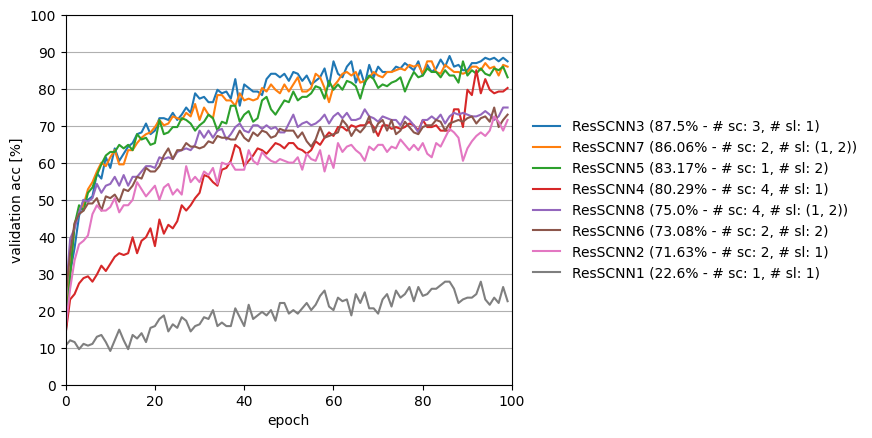

In [11]:
fig, ax = plt.subplots()

for label in list(sorted_labels):
    _ = np.round(architectures_TM[label]['epochs_acc'][-1], 2)
    nb_skip = nb_skip_conns[label]['nb_skip_conns']
    nb_skiped_l = nb_skip_conns[label]['nb_jumped_layer']
    txt = f'{label} ({_}% - # sc: {nb_skip}, # sl: {nb_skiped_l})'
    ax.plot(np.arange(len(architectures_TM[label]['epochs_x'])), architectures_TM[label]['epochs_acc'], label=txt)

ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 110, 10))
ax.set_ylabel('validation acc [%]')
ax.set_xlim(0, 100)
ax.set_xlabel('epoch')

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.8, 0.5), framealpha=0)
ax.grid(axis='y')

plt.show()

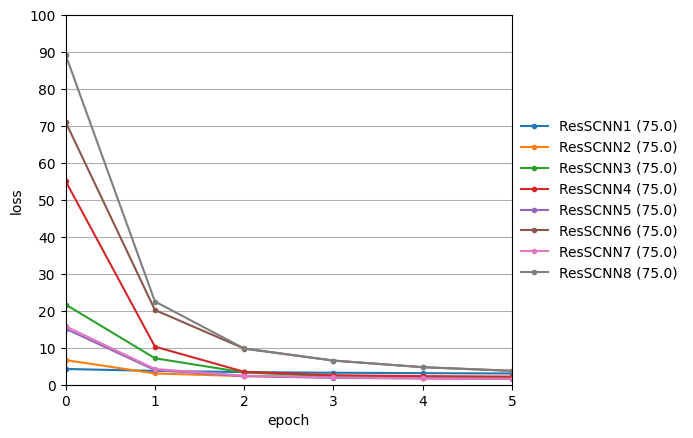

In [ ]:
fig, ax = plt.subplots()
epoch_lim = 6

for key, val in architectures_TM.items():
    y_avg = []
    for y in val['epochs_y']:
        y_avg.append(np.mean(y))
    _ - np.round(y_avg[-1], 2)
    ax.plot(np.arange(len(val['epochs_x']))[:epoch_lim], y_avg[:epoch_lim], label=f'{key} ({_})', marker='.')

ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 110, 10))
ax.set_ylabel('loss')
ax.set_xlim(0, epoch_lim-1)
ax.set_xlabel('epoch')

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), framealpha=0)
ax.grid(axis='y')

plt.show()

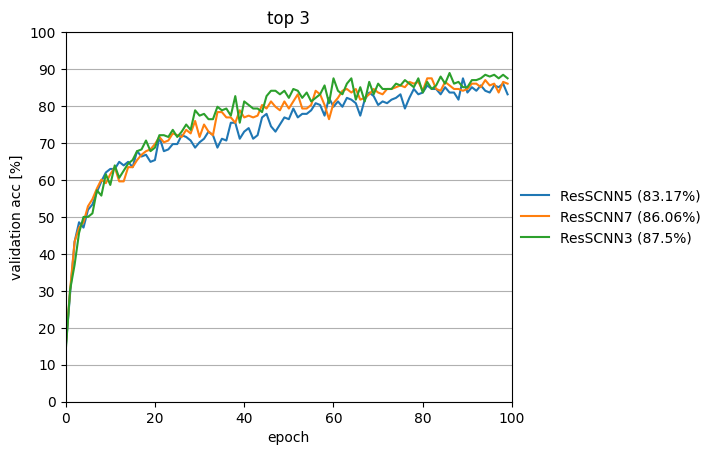

In [ ]:
fig, ax = plt.subplots()

for idx in top_indices:
    _ = np.round(architectures_TM[f'ResSCNN{idx+1}']['epochs_acc'][-1], 2)
    ax.plot(np.arange(len(architectures_TM[f'ResSCNN{idx+1}']['epochs_x'])), architectures_TM[f'ResSCNN{idx+1}']['epochs_acc'], label=f'ResSCNN{idx+1} ({_}%)')

ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 110, 10))
ax.set_ylabel('validation acc [%]')
ax.set_xlim(0, 100)
ax.set_xlabel('epoch')
plt.title(f'top {top_n}')

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), framealpha=0)
ax.grid(axis='y')

plt.show()

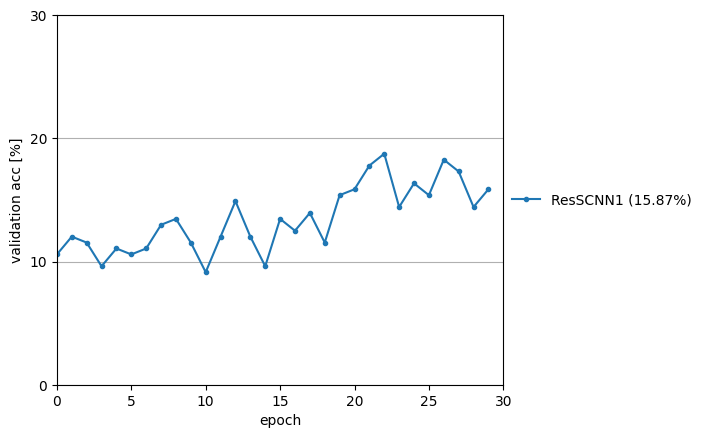

In [ ]:
fig, ax = plt.subplots()

key = 'ResSCNN1'
max_epochs = 30
max_y = 30

_ = np.round(architectures_TM[key]['epochs_acc'][max_y-1], 2)
ax.plot(np.arange(len(architectures_TM[key]['epochs_x'][:max_epochs])), architectures_TM[key]['epochs_acc'][:max_epochs], label=f'{key} ({_}%)', marker='.')

ax.set_ylim(0, max_y)
ax.set_yticks(np.arange(0, max_y+10, 10))
ax.set_ylabel('validation acc [%]')
ax.set_xlim(0, max_epochs)
ax.set_xlabel('epoch')

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), framealpha=0)
ax.grid(axis='y')

plt.show()

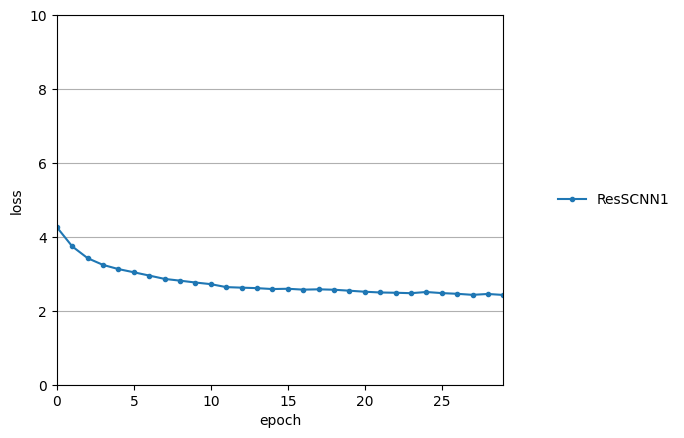

In [ ]:
fig, ax = plt.subplots()

val = architectures_TM[key]
y_avg = []
for y in val['epochs_y']:
    y_avg.append(np.mean(y))
_ - np.round(y_avg[-1], 2)
ax.plot(np.arange(len(val['epochs_x']))[:max_epochs], y_avg[:max_epochs], label=f'{key}', marker='.')

ax.set_ylim(0, 10)
ax.set_ylabel('loss')
ax.set_xlim(0, max_epochs-1)
ax.set_xlabel('epoch')

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), framealpha=0)
ax.grid(axis='y')

plt.show()